In [115]:
import numpy as np
from qutip import *
import pylab as plt

In [130]:
N = 25
taus = np.linspace(0, 25.0, 200)
a = destroy(N)
n_op = a.dag()*a
H = 2 * np.pi * n_op

In [143]:
kappa = 0.25
n_th = 2.0  # bath temperature in terms of excitation number
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag()]

In [144]:
states = [{'state': coherent_dm(N, np.sqrt(2)), 'label': "coherent state"},
          {'state': thermal_dm(N, 2), 'label': "thermal state"},
          {'state': fock_dm(N, 2), 'label': "Fock state"}]

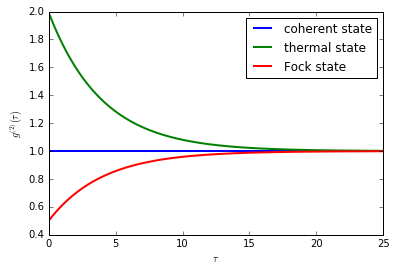

In [145]:
fig, ax = plt.subplots(1, 1)

for state in states:
    rho0 = state['state']

    # first calculate the occupation number as a function of time
    n = mesolve(H, rho0, taus, c_ops, [n_op]).expect[0]

    # calculate the correlation function G2 and normalize with n(0)n(t) to
    # obtain g2
    G2 = correlation_3op_1t(H, rho0, taus, c_ops, a.dag(), a.dag()*a, a)
    g2 = G2 / (n[0] * n)
    
    

    ax.plot(taus, np.real(g2), label=state['label'], lw=2)
    
ax.legend(loc=0)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$g^{(2)}(\tau)$')

In [128]:
variance?

In [133]:
result = mesolve(H, coherent_dm(N, np.sqrt(2)), taus, c_ops, [n_op])

In [146]:
result.expect[0]

array([ 2.        ,  2.        ,  2.        ,  2.        ,  2.        ,
        2.        ,  2.        ,  1.99999998,  1.99999996,  1.9999999 ,
        1.9999998 ,  1.99999962,  1.99999933,  1.9999989 ,  1.99999828,
        1.99999743,  1.9999963 ,  1.99999484,  1.99999302,  1.99999078,
        1.9999881 ,  1.99998494,  1.99998126,  1.99997706,  1.99997231,
        1.999967  ,  1.99996112,  1.99995469,  1.99994768,  1.99994013,
        1.99993204,  1.99992342,  1.9999143 ,  1.9999047 ,  1.99989463,
        1.99988414,  1.99987323,  1.99986195,  1.99985032,  1.99983837,
        1.99982612,  1.99981362,  1.99980088,  1.99978793,  1.99977482,
        1.99976155,  1.99974816,  1.99973467,  1.99972111,  1.99970749,
        1.99969386,  1.99968021,  1.99966658,  1.99965298,  1.99963943,
        1.99962594,  1.99961254,  1.99959923,  1.99958604,  1.99957296,
        1.99956002,  1.99954721,  1.99953456,  1.99952208,  1.99950975,
        1.99949761,  1.99948564,  1.99947386,  1.99946227,  1.99